# Aufgabe 9
## a)

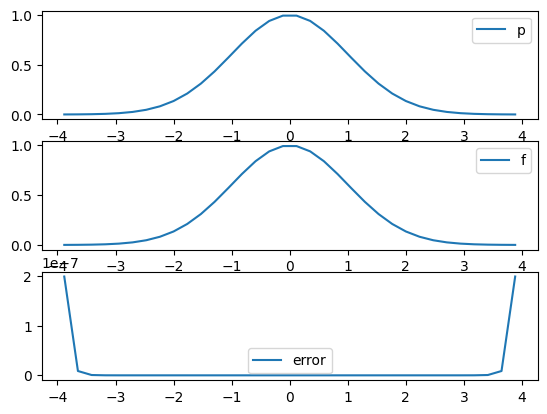

In [7]:
import numpy as np
import matplotlib.pyplot as plt


m=34
a = -4
b = 4

i_range = np.arange(m + 1)
x_range = a + (b-a) / m * i_range
t_range = (x_range[1:]+x_range[:-1]) / 2


def newton(x_val):
    m =  len(x_range)
    s_range = np.exp(- x_range ** 2 / 2)
    b_list = np.zeros(shape=(m,m))
    b_list[0] = s_range
    ret = b_list[0][0]
    for i in range(1,m):
        b_list[i,i:m] = np.diff(b_list[i-1,i-1:m]) / (x_range[i:m]-x_range[0:m-i])
        ret += b_list[i][i] * np.prod(x_val-x_range[0:i])
    return ret


newton = np.vectorize(newton)

newton_range = newton(t_range)
exp_range = np.exp(- t_range ** 2 / 2)
error_range = abs(newton_range-exp_range)

# print(newton_range)
# print(exp_range)
# print(error_range)

fig, ax = plt.subplots(3)
ax[0].plot(t_range, newton_range, label='p')
ax[0].legend()
ax[1].plot(t_range, exp_range, label='f')
ax[1].legend()
ax[2].plot(t_range, error_range, label='error')
ax[2].legend()


## b)

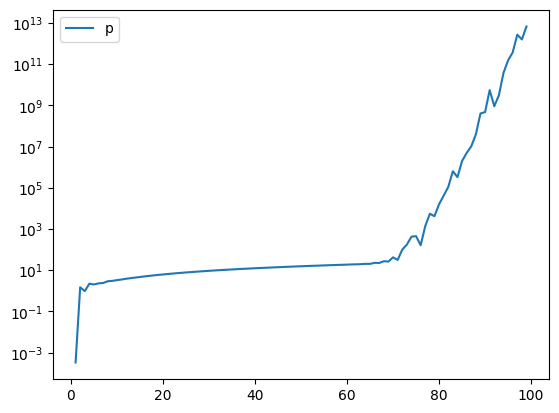

In [2]:
import numpy as np
import matplotlib.pyplot as plt

m_range = np.arange(1,100)
a = -4
b = 4

def em(m):
    i_range = np.arange(m + 1)
    x_range = a + (b-a) / m * i_range
    t_range = (x_range[1:]+x_range[:-1]) / 2


    def newton(x_val):
        m =  len(x_range)
        s_range = np.exp(- x_range ** 2 / 2)
        b_list = np.zeros(shape=(m,m))
        b_list[0] = s_range
        ret = b_list[0][0]
        for i in range(1,m):
            b_list[i,i:m] = np.diff(b_list[i-1,i-1:m]) / (x_range[i:m]-x_range[0:m-i])
            ret += b_list[i][i] * np.prod(x_val-x_range[0:i])
        return ret
    

    newton = np.vectorize(newton)

    return np.linalg.norm(newton(t_range), ord=1)


em = np.vectorize(em)

em(m_range)

fig, ax = plt.subplots()
ax.semilogy(m_range, em(m_range), label='p')
ax.legend()